# Chapter 14: Singular Value Decomposition

## Concepts

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# How numpy computes matrix rank

matrix_a = np.random.randn(3, 4)

def matrix_rank(M):
    S = np.linalg.svd(M, compute_uv=False)
    tol = S.max() * max(M.shape[-2:]) * np.finfo(S.dtype).eps
    return np.count_nonzero(S > tol)

rank_a = matrix_rank(matrix_a)
rank_b = np.linalg.matrix_rank(matrix_a)

check = rank_a == rank_b
print("My implementation for calculating matrix rank matches numpy's:", check)

My implementation for calculating matrix rank matches numpy's: True


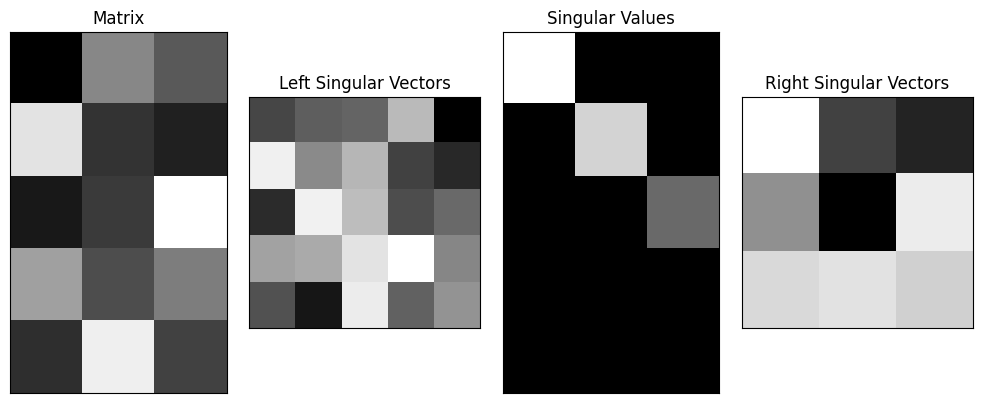

In [9]:
# Singular Value Decomposition (SVD)

matrix_a = np.random.randn(5, 3)

U, s, Vt = np.linalg.svd(matrix_a)

# Create singular values matrix
S = np.zeros(np.shape(matrix_a))
np.fill_diagonal(S, s)

# Create plot
fig, axis = plt.subplots(1, 4, figsize=(10, 4))
titles = ['Matrix', 'Left Singular Vectors', 'Singular Values', 'Right Singular Vectors']
matrices = [matrix_a, U, S, Vt]

for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [21]:
# Symmetrical Matrix (Eigenvalues & Singular values are the same!)

matrix_a = np.random.randn(7, 3)
symmetrical_matrix_a = matrix_a.T @ matrix_a

sinvals = np.linalg.svd(symmetrical_matrix_a)[1]
evals = np.linalg.eig(symmetrical_matrix_a)[0]

check = np.allclose(np.sort(np.round(sinvals, 5)), np.sort(np.round(evals, 5)))
print("Singular values and Eigenvalues are the same for Symmetrical Matrix:", check)

Singular values and Eigenvalues are the same for Symmetrical Matrix: True


## Code Exercises

In [ ]:
# Exercise 14-1 (Compare singular vectors and eigenvectors for a symmetrical matrix)

In [ ]:
# Exercise 14-2 (Calculate economy singular value matrices using numpy)

In [ ]:
# Exercise 14-3 (Confirm that Singular Value Matrices rotate but do not scale vectors)

In [ ]:
# Exercise 14-4 (Create a random tall matrix with a specified condition number)

In [ ]:
# Exercise 14-5 (Perform and visualize SVD on a smoothed random matrix)

In [ ]:
# Exercise 14-6 (Implement MP psuedo-inverse)

In [ ]:
# Exercise 14-7 (Confirm that the MP psuedo-inverse equals the left-inverse for a full column rank matrix)

In [ ]:
# Exercise 14-8 (Manipulating eigenvalue equation with psuedo-inverse)